In [1]:
import numpy as np
import math
import wave
import os
import struct
import librosa
import matplotlib.pyplot as plt
from ipynb.fs.full.Tempo_identification import find_onset, find_tempo
#from ipynb.fs.full.Scale_identification_and_transposing import identify_scale, transpose

Estimated tempo: 80.75 BPM
[ 37  53  69 102 134 166 231 247 263 296 328 360 424 441 457 489 521 538
 554]


In [2]:
def note_detect(audio_file):
    file_length=audio_file.getnframes() 
    f_s=audio_file.getframerate() #sampling frequency
    sound = np.zeros(file_length) #blank array

    for i in range(file_length) : 
        wdata=audio_file.readframes(1)
        data=struct.unpack("<i",wdata)
        sound[i] = int(data[0])

    plt.plot(sound)
    plt.show()

    sound=np.divide(sound,float(2**15)) #scaling it to 0 - 1
    counter = audio_file.getnchannels() #number of channels mono/sterio
    
    plt.plot(sound)
    plt.show()

    #fourier transformation from numpy module
    fourier = np.fft.fft(sound)
    fourier = np.absolute(fourier)
    imax=np.argmax(fourier[0:int(file_length/2)]) #index of max element

    plt.plot(fourier)
    plt.show()

    #peak detection
    i_begin = -1
    threshold = 0.3 * fourier[imax]
    for i in range (0,imax+100):
        if fourier[i] >= threshold:
            if(i_begin==-1):
                i_begin = i
        if(i_begin!=-1 and fourier[i]<threshold):
            break
    i_end = i
    imax = np.argmax(fourier[0:i_end+100])

    freq=(imax*f_s)/(file_length*counter) #formula to convert index into sound frequency
    
    #frequency database
    note=0
    name = np.array(['C1', 'C#1', 'D1', 'D#1', 'E1', 'F1', 'F#1', 'G1', 'G#1', 'A1', 'A#1', 'B1',
                    'C2', 'C#2', 'D2', 'D#2', 'E2', 'F2', 'F#2', 'G2', 'G#2', 'A2', 'A#2', 'B2',
                    'C3', 'C#3', 'D3', 'D#3', 'E3', 'F3', 'F#3', 'G3', 'G#3', 'A3', 'A#3', 'B3',
                    'C4', 'C#4', 'D4', 'D#4', 'E4', 'F4', 'F#4', 'G4', 'G#4', 'A4', 'A#4', 'B4',
                    'C5', 'C#5', 'D5', 'D#5', 'E5', 'F5', 'F#5', 'G5', 'G#5', 'A5', 'A#5', 'B5',
                    'C6', 'C#6', 'D6', 'D#6', 'E6', 'F6', 'F#6', 'G6', 'G#6', 'A6', 'A#6', 'B6',
                    'C7', 'C#7', 'D7', 'D#7', 'E7', 'F7', 'F#7', 'G7', 'G#7', 'A7', 'A#7', 'B7',
                    'C8', 'C#8', 'D8', 'D#8', 'E8', 'F8', 'F#8', 'G8', 'G#8', 'A8', 'A#8', 'B8', 'C9'])
    frequencies = np.array([16.35, 17.32, 18.35, 19.45, 20.60, 21.83, 23.12, 24.50, 25.96, 27.50, 29.14, 30.87,
                            32.70, 34.65, 36.71, 38.89, 41.20, 43.65, 46.25, 49.00, 51.91, 55.0, 58.27, 61.74,
                            65.41, 69.30, 73.42, 77.78, 82.41, 87.31, 92.50, 98.00, 103.83, 110.00, 116.54, 123.47,
                            130.81, 138.59, 146.83, 155.56, 164.81, 174.61, 185.00, 196.00, 207.65, 220.00, 233.08, 246.94,
                            261.63, 277.18, 293.66, 311.13, 329.63, 349.23, 369.99, 392.00, 415.30, 440.00, 466.16, 493.88,
                            523.25 , 554.37, 587.33, 622.25, 659.26, 698.46, 739.99, 783.99, 830.61, 880.00, 932.33, 987.77,
                            1046.50, 1108.73, 1174.66, 1244.51, 1318.51, 1396.91, 1479.98, 1567.98, 1661.22, 1760.00, 1864.66, 1975.53,
                            2093.00, 2217.46, 2349.32, 2489.02, 2637.02, 2793.83, 2959.96, 3135.96, 3322.44, 3520.00, 3729.31, 3951.07,
                            4186.01, 4434.92, 4698.64, 4978.03, 5274.04, 5587.65, 5919.91, 6271.93, 6644.88, 7040.00, 7458.62, 7902.13, 8000])

    print(freq)
    
    #searching for matched frequencies
    for i in range(0,frequencies.size-1):
            if(freq<frequencies[0]):
                note=name[0]
                break
            if(freq>frequencies[-1]):
                note=name[-1]
                break
            if freq>=frequencies[i] and frequencies[i+1]>=freq :
                if freq-frequencies[i]<(frequencies[i+1]-frequencies[i])/2 :
                    note=name[i]
                else :
                    note=name[i+1]
                break

    return note


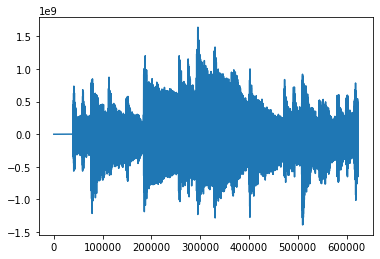

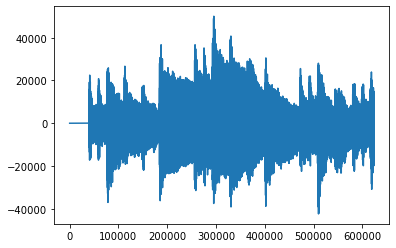

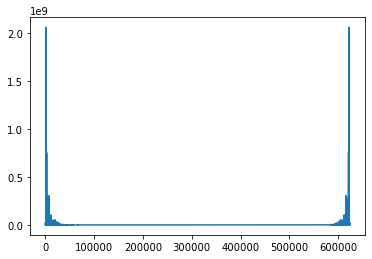

48.832108361873246
Detected Note = G1


In [3]:
if __name__ == "__main__":

    path = os.getcwd()
    #file_name = path + "//wav files//c6.wav"
    audio_file = wave.open("hdb.wav")
    Detected_Note = note_detect(audio_file)
    print("Detected Note = " + str(Detected_Note))

In [4]:
# import numpy as np
# import wave
# import struct

# def find_nearest(array,value):
#     idx = (np.abs(array-value)).argmin()
#     return array[idx]

# ############################## Initialize ##################################


# # Some Useful Variables
# sampling_freq = 44100 # Sampling frequency of audio signal
# notes = np.array(["C0","C#0","D0","D#0","E0","F0","F#0","G0","G#0","A0","A#0","B0",
#                   "C1","C#1","D1","D#1","E1","F1","F#1","G1","G#1","A1","A#1","B1",
#                   "C2","C#2","D2","D#2","E2","F2","F#2","G2","G#2","A2","A#2","B2",
#                   "C3","C#3","D3","D#3","E3","F3","F#3","G3","G#3","A3","A#3","B3",  
#                   "C4","C#4","D4","D#4","E4","F4","F#4","G4","G#4","A4","A#4","B4",
#                   "C5","C#5","D5","D#5","E5","F5","F#5","G5","G#5","A5","A#5","B5",
#                   "C6","C#6","D6","D#6","E6","F6","F#6","G6","G#6","A6","A#6","B6",
#                   "C7","C#7","D7","D#7","E7","F7","F#7","G7","G#7","A7","A#7","B7",
#                   "C8","C#8","D8","D#8","E8","F8","F#8","G8","G#8","A8","A#8","B8","C9+"])
    
# array = np.array([16.35, 17.32, 18.35, 19.45, 20.60, 21.83, 23.12, 24.50, 25.96, 27.50, 29.14, 30.87, 
#                   32.70, 34.65, 36.71, 38.89, 41.20, 43.65, 46.25, 49.00, 51.91, 55.0, 58.27, 61.74,
#                   65.41, 69.30, 73.42, 77.78, 82.41, 87.31, 92.50, 98.00, 103.83, 110.00, 116.54, 123.47,
#                   130.81, 138.59, 146.83, 155.56, 164.81, 174.61, 185.00, 196.00, 207.65, 220.00, 233.08, 246.94,
#                   261.63, 277.18, 293.66, 311.13, 329.63, 349.23, 369.99, 392.00, 415.30, 440.00, 466.16, 493.88,
#                   523.25 , 554.37, 587.33, 622.25, 659.26, 698.46, 739.99, 783.99, 830.61, 880.00, 932.33, 987.77,
#                   1046.50, 1108.73, 1174.66, 1244.51, 1318.51, 1396.91, 1479.98, 1567.98, 1661.22, 1760.00, 1864.66, 1975.53,
#                   2093.00, 2217.46, 2349.32, 2489.02, 2637.02, 2793.83, 2959.96, 3135.96, 3322.44, 3520.00, 3729.31, 3951.07,
#                   4186.01, 4434.92, 4698.64, 4978.03, 5274.04, 5587.65, 5919.91, 6271.93, 6644.88, 7040.00, 7458.62, 7902.13, 8000])
# Identified_Notes = []

# ############################## Read Audio File #############################
# print ('Reading Audio File...')

# sound_file = wave.open('hdb.wav', 'r')
# audio_file = librosa.load('hdb.wav')
# frames = find_onset(audio_file)
# tempo, beat_times = find_tempo(audio_file)
# file_length = sound_file.getnframes()
# print(file_length)
# sound = np.zeros(file_length)
# mean_square = []
# sound_square = np.zeros(file_length)
# for i in range(file_length):
#     data = sound_file.readframes(1)
#     data = struct.unpack("<i", data)
#     sound[i] = int(data[0])
    
# sound = np.divide(sound, float(2**15))# Normalize data in range -1 to 1


# ######################### DETECTING SCILENCE ##################################

# sound_square = np.square(sound)
# frequency = []
# dft = []
# i = 0
# j = 0
# k = 0    

# for a in range(len(frames)-1):
#     i = frames[a+1]*1000
#     k = frames[a]*1000
#     dft = np.array(dft) # applying fourier transform function
#     dft = np.fft.fft(sound[k:i])
#     dft=np.argsort(dft)

#     if(dft[0]>dft[-1] and dft[1]>dft[-1]):
#         i_max = dft[-1]
#     elif(dft[1]>dft[0] and dft[-1]>dft[0]):
#         i_max = dft[0]
#     else :
#         i_max = dft[1]
#     frequency.append((i_max*sampling_freq)/(i-k))
#     dft = []

# print('length',len(frequency))
# print("\nFrequency")   

# freqs = []
# for i in frequency :
#     freqs.append(round(i,2))
#     idx = (np.abs(array-i)).argmin()
#     Identified_Notes.append(notes[idx])

# print(freqs)
# print('\nNotes')
# print(Identified_Notes)
# print(f'\nTempo {round(tempo, 2)} BPM')
# print("\n Beat times")
# print(beat_times)

Reading Audio File...
623688
length 18

Frequency
[270.11, 270.11, 89.54, 89.58, 179.16, 100.41, 99.22, 99.22, 100.23, 100.6, 100.6, 101.29, 101.17, 88.2, 179.16, 179.16, 88.2, 90.96]

Notes
['C#4', 'C#4', 'F2', 'F2', 'F3', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G#2', 'G#2', 'F2', 'F3', 'F3', 'F2', 'F#2']

Tempo 80.75 BPM

 Beat times
[ 0.11609977  0.85913832  1.62539683  2.36843537  3.13469388  3.87773243
  4.62077098  5.36380952  6.13006803  6.87310658  7.61614512  8.38240363
  9.12544218  9.86848073 10.61151927 11.37777778]


In [1]:
import numpy as np
import wave
import struct

def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

############################## Initialize ##################################


# Some Useful Variables
def note_detection(sound_file):
    window_size = 1000    # Size of window to be used for detecting silence
    max_notes = 100    # Maximum number of notes in file, for efficiency
    sampling_freq = 44100 # Sampling frequency of audio signal
    threshold = 600
    notes = np.array(["C0","C#0","D0","D#0","E0","F0","F#0","G0","G#0","A0","A#0","B0",
                      "C1","C#1","D1","D#1","E1","F1","F#1","G1","G#1","A1","A#1","B1",
                      "C2","C#2","D2","D#2","E2","F2","F#2","G2","G#2","A2","A#2","B2",
                      "C3","C#3","D3","D#3","E3","F3","F#3","G3","G#3","A3","A#3","B3",  
                      "C4","C#4","D4","D#4","E4","F4","F#4","G4","G#4","A4","A#4","B4",
                      "C5","C#5","D5","D#5","E5","F5","F#5","G5","G#5","A5","A#5","B5",
                      "C6","C#6","D6","D#6","E6","F6","F#6","G6","G#6","A6","A#6","B6",
                      "C7","C#7","D7","D#7","E7","F7","F#7","G7","G#7","A7","A#7","B7",
                      "C8","C#8","D8","D#8","E8","F8","F#8","G8","G#8","A8","A#8","B8","C9+"])

    array = np.array([16.35, 17.32, 18.35, 19.45, 20.60, 21.83, 23.12, 24.50, 25.96, 27.50, 29.14, 30.87, 
                      32.70, 34.65, 36.71, 38.89, 41.20, 43.65, 46.25, 49.00, 51.91, 55.0, 58.27, 61.74,
                      65.41, 69.30, 73.42, 77.78, 82.41, 87.31, 92.50, 98.00, 103.83, 110.00, 116.54, 123.47,
                      130.81, 138.59, 146.83, 155.56, 164.81, 174.61, 185.00, 196.00, 207.65, 220.00, 233.08, 246.94,
                      261.63, 277.18, 293.66, 311.13, 329.63, 349.23, 369.99, 392.00, 415.30, 440.00, 466.16, 493.88,
                      523.25 , 554.37, 587.33, 622.25, 659.26, 698.46, 739.99, 783.99, 830.61, 880.00, 932.33, 987.77,
                      1046.50, 1108.73, 1174.66, 1244.51, 1318.51, 1396.91, 1479.98, 1567.98, 1661.22, 1760.00, 1864.66, 1975.53,
                      2093.00, 2217.46, 2349.32, 2489.02, 2637.02, 2793.83, 2959.96, 3135.96, 3322.44, 3520.00, 3729.31, 3951.07,
                      4186.01, 4434.92, 4698.64, 4978.03, 5274.04, 5587.65, 5919.91, 6271.93, 6644.88, 7040.00, 7458.62, 7902.13, 8000])
    Identified_Notes = []

    file_length = sound_file.getnframes()
    sound = np.zeros(file_length)
    mean_square = []
    sound_square = np.zeros(file_length)
    for i in range(file_length):
        data = sound_file.readframes(1)
        data = struct.unpack("<i", data)
        sound[i] = int(data[0])

    sound = np.divide(sound, float(2**15))# Normalize data in range -1 to 1


    ######################### DETECTING SCILENCE ##################################

    sound_square = np.square(sound)
    frequency = []
    dft = []
    i = 0
    j = 0
    k = 0    
    # traversing sound_square array with a fixed window_size
    while(i<=len(sound_square)-window_size):
        s = 0.0
        j = 0
        while(j<=window_size):
            s = s + sound_square[i+j]
            j = j + 1
    # detecting the silence waves
        if s > 0:
            if(i-k>window_size*4):
                dft = np.array(dft) # applying fourier transform function
                dft = np.fft.fft(sound[k:i])
                dft=np.argsort(dft)

                if(dft[0]>dft[-1] and dft[1]>dft[-1]):
                    i_max = dft[-1]
                elif(dft[1]>dft[0] and dft[-1]>dft[0]):
                    i_max = dft[0]
                else :
                    i_max = dft[1]
                frequency.append((i_max*sampling_freq)/(i-k))
                dft = []
                k = i+1
        i = i + window_size

    #print('length',len(frequency))
    #print("frequency")   

    for i in frequency :
        idx = (np.abs(array-i)).argmin()
        Identified_Notes.append(notes[idx])
    return frequency, Identified_Notes

In [12]:
file = wave.open('hdb.wav', 'r')
freq, note = note_detection(file)

Reading Audio File...
623688
